<a href="https://colab.research.google.com/github/AHAMEDYUNUS/Machine-Learning-projects/blob/main/RoofTop_Solar_Panel_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [ ]:
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Add

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR_TRAIN_IMAGES = "/content/drive/MyDrive/Machine Learning projects/Roof Top Solar Panel Detection/Data/data/training/"
DIR_TRAIN_LABELS = "/content/drive/MyDrive/Machine Learning projects/Roof Top Solar Panel Detection/Data/data/labels_training.csv"

#**EXPLORATORY DATA ANALYSIS**

In [ ]:
pd.read_csv(DIR_TRAIN_LABELS).head(5)

,id,label
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1


In [ ]:
#loading data and preprocessing
def load_data(dir_data, dir_labels):
    dir_data="/content/drive/MyDrive/Machine Learning projects/Roof Top Solar Panel Detection/Data/data/training/"
    dir_labels="/content/drive/MyDrive/Machine Learning projects/Roof Top Solar Panel Detection/Data/data/labels_training.csv"
    labels_pd = pd.read_csv(dir_labels)
    ids=labels_pd.id.values
    data=[]
    for identifier in ids:
        fname = dir_data + identifier.astype(str) + '.tif'
        image = mpl.image.imread(fname)
        data.append(image)
    data=np.array(data)
    labels=labels_pd.label.values
    return data,labels

In [ ]:
#loadinf train data
X, y = load_data(DIR_TRAIN_IMAGES, DIR_TRAIN_LABELS)

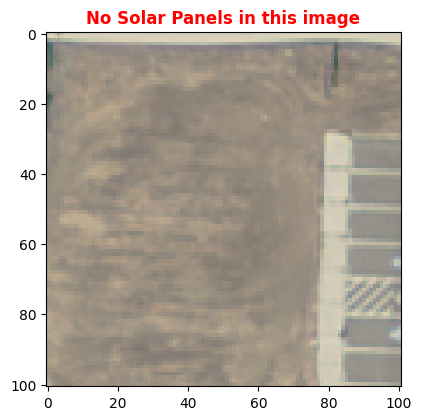

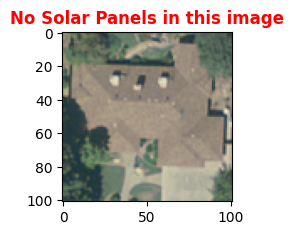

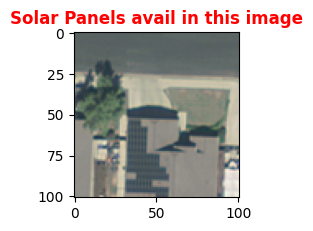

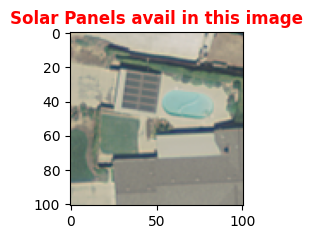

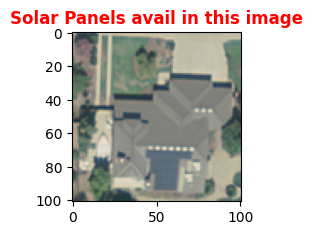

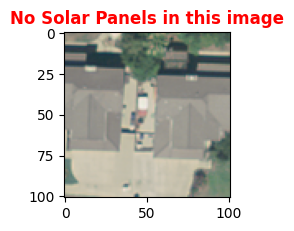

In [ ]:
plt.figure(figsize=(13,8))
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(X[i])
  if y[i]==0:
    title='No Solar Panels in this image'
  else:
    title='Solar Panels avail in this image'
  plt.title(title, color='red', weight='bold')
  plt.tight_layout()
  plt.show()

In [ ]:
X.shape

(1500, 101, 101, 3)

Out of 1500 images
*   995 are without any solar panels
*   505 images are with solar panels

In [ ]:
np.bincount(y)

array([995, 505])

In [ ]:
# scaling pixel values between 0 and 1
X=X/255.0

#**BUILDING THE CNN MODEL**

In [ ]:
#defining CNN
def build_model():
  IMAGE_HEIGHT=101
  IMAGE_WIDTH=101
  IMAGE_CHANNELS=3
  model=Sequential()
  #layer 1
  model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)))
  model.add(BatchNormalization())
  #layer 2
  model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
  model.add(BatchNormalization())
  #layer 3
  model.add(Conv2D(filters=128,
                     kernel_size=3,
                     activation='relu'))
  model.add(BatchNormalization())
  #layer 4
  model.add(Conv2D(filters=64,
                     kernel_size=3,
                     activation='relu'))
  model.add(BatchNormalization())
  #layer 5
  model.add(Conv2D(filters=128,
                   kernel_size=3,
                     activation='relu'))
  model.add(BatchNormalization())
  # max-pool
  model.add(MaxPooling2D(pool_size=2))
  # layer-6
  model.add(Conv2D(filters=64,
                   kernel_size=3,
                     activation='relu'))
  model.add(BatchNormalization())
  # layer-7
  model.add(Conv2D(filters=128,
                    kernel_size=3,
                    activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPooling2D())

  # output layer
  model.add(Dense(1, activation='sigmoid'))

  # compile model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model



#**Checking Performance**

In [ ]:
def cv_performance_assessment(X, y, num_folds, clf, random_seed=1):

    prediction_scores = np.empty(y.shape[0], dtype='object')
    kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=random_seed)

    for train_index, val_index in kf.split(X, y):

        X_train, X_val = X[train_index], X[val_index]
        y_train = y[train_index]

        class_weight = {0: 505/1500, 1: 995/1500}

        # train the classifier
        training = clf.fit(x=X_train,
                           y=y_train,
                           class_weight=class_weight,
                           batch_size=32,
                           epochs=10,
                           shuffle=True,
                           verbose=1)

        # test the classifier on the validation data for this fold
        y_val_pred_probs = clf.predict(X_val).reshape((-1, ))

        prediction_scores[val_index] = y_val_pred_probs

    return prediction_scores

In [ ]:
num_folds = 3
random_seed = 1
cnn = build_model()
cnn.summary()
cnn_y_hat_prob = cv_performance_assessment(X, y, num_folds, cnn, random_seed=random_seed)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 99, 99, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 99, 99, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 97, 97, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 95, 95, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 95, 95, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 93, 93, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 93, 93, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 91, 91, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 91, 91, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 43, 43, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 43, 43, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 41, 41, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 391,105 (1.49 MB)

 Trainable params: 389,889 (1.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 410ms/step - accuracy: 0.5467 - loss: 0.5558
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.8104 - loss: 0.1894
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8907 - loss: 0.1233
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.8794 - loss: 0.1209
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9251 - loss: 0.0945
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9607 - loss: 0.0551
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9490 - loss: 0.0630
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.9799 - loss: 0.0307
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9952 - loss: 0.0143
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9951 - loss: 0.0124
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 237ms/step
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.9680 - loss: 0.0376
Epoch 2/10


In [ ]:
df = pd.read_csv(DIR_TRAIN_LABELS)
df["predicted_class"] = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]

fn = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 0)]['id'])      # False Negative
fp = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 1)]['id'])      # False Positive
tp = np.array(df[(df['label'] == 1) & (df['predicted_class'] == 1)]['id'])      # True Positive
tn = np.array(df[(df['label'] == 0) & (df['predicted_class'] == 0)]['id'])

In [ ]:
#Visuals of TP, TN, FP, and FN
def show_images(image_ids, num_images, title, color):
    rcParams['figure.figsize'] = 20, 4
    plt.figure()
    n = 1
    for i in image_ids[0:num_images]:
        plt.subplot(1, num_images, n)
        plt.imshow(X[i, :, :, :])
        plt.title('Image id: ' + str(i))
        plt.axis('off')
        n+=1
    plt.suptitle('\n'+title, fontsize=15, color = color, weight = 'bold')
    plt.show()

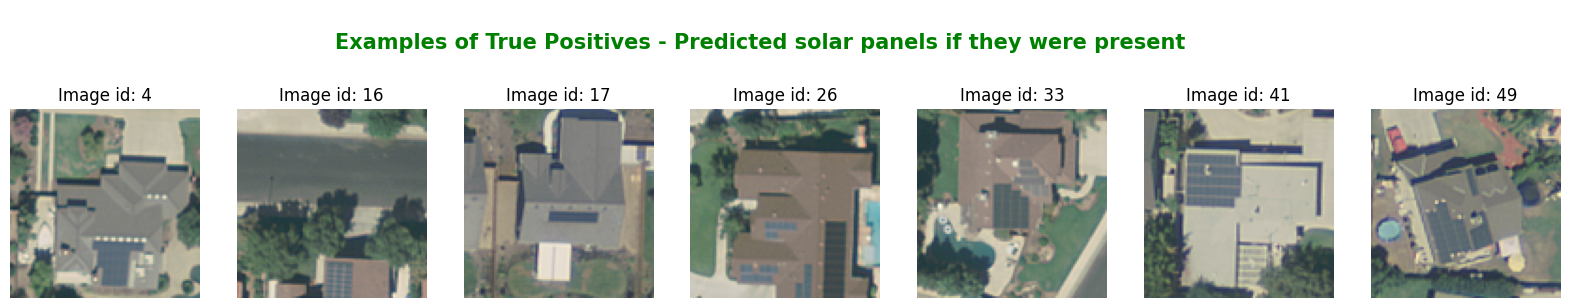

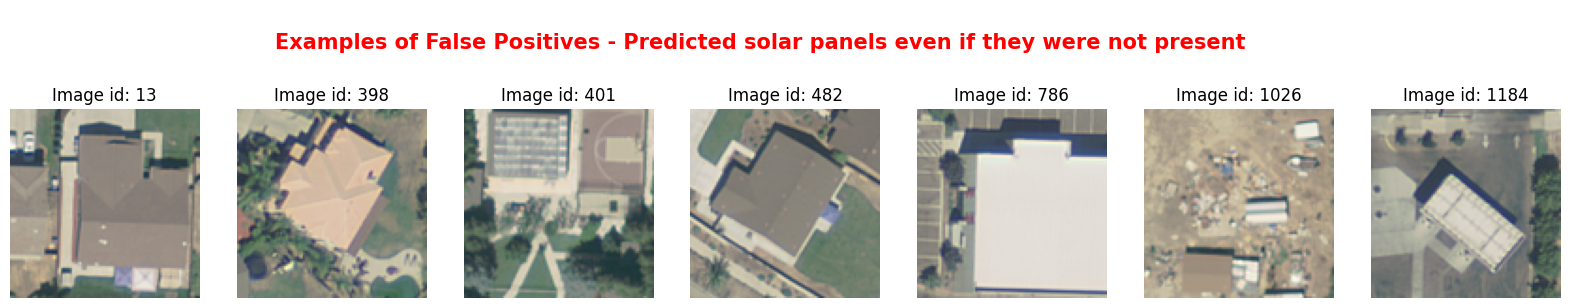

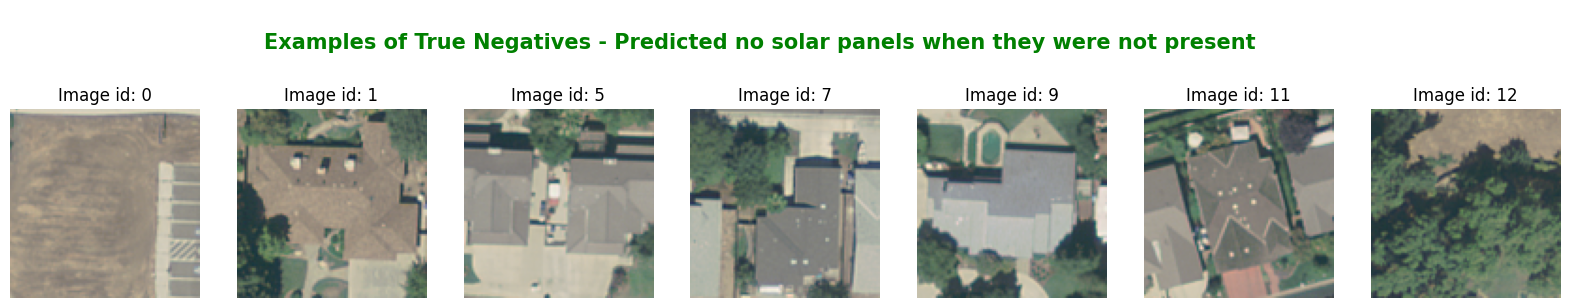

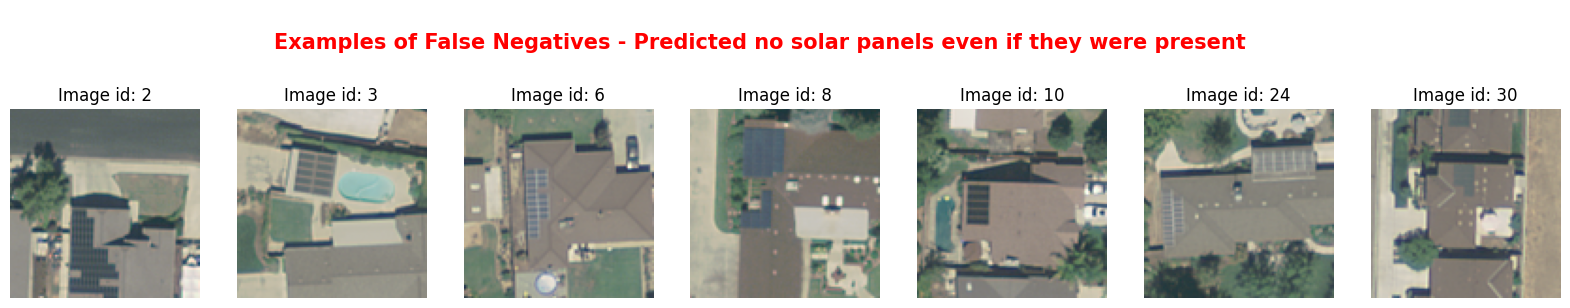

In [ ]:
num_images = 7  # number of images to look at
show_images(tp, num_images, 'Examples of True Positives - Predicted solar panels if they were present', 'g')
show_images(fp, num_images, 'Examples of False Positives - Predicted solar panels even if they were not present', 'r')
show_images(tn, num_images, 'Examples of True Negatives - Predicted no solar panels when they were not present', 'g')
show_images(fn, num_images, 'Examples of False Negatives - Predicted no solar panels even if they were present', 'r')


#**Model evaluation & Results**

In [ ]:
# ROC - AUC
def plot_roc(y_true, y_pred_cnn):

    plt.figure(figsize=(5, 5))

    # ROC of CNN
    fpr, tpr, _ = roc_curve(y_true, y_pred_cnn, pos_label=1)
    auc = roc_auc_score(y_true, y_pred_cnn)
    legend_string = 'CNN Model - AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, color='red', label=legend_string)

    # ROC of chance
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance - AUC = 0.5')

    # plot aesthetics
    plt.figure(figsize=(5,5))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.title('ROC Curve', fontsize=10)
    pass

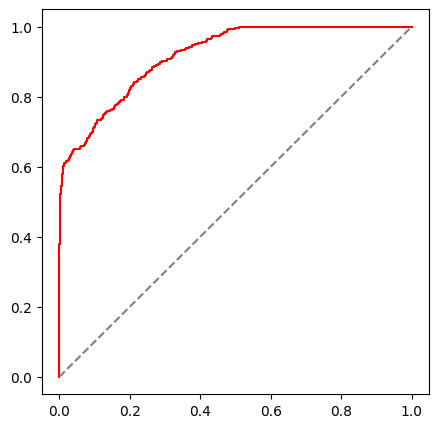

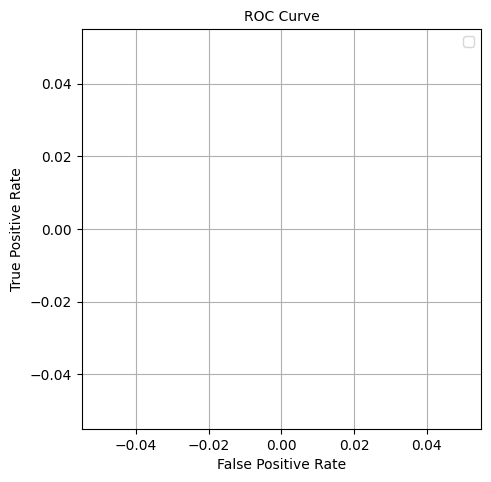

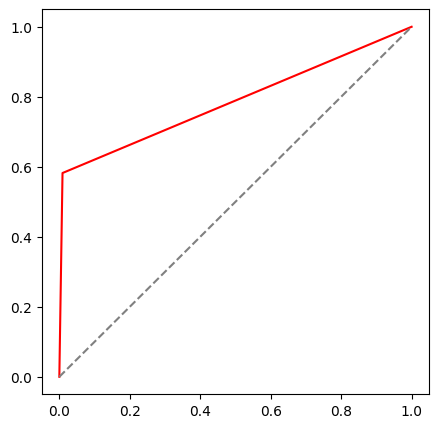

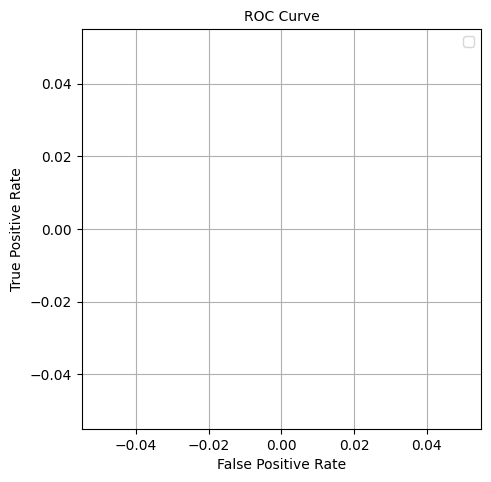

In [ ]:
# plot ROC
y_pred = [1 if pred >= 0.5 else 0 for pred in cnn_y_hat_prob]
plot_roc(y,  cnn_y_hat_prob)
plot_roc(y, y_pred)

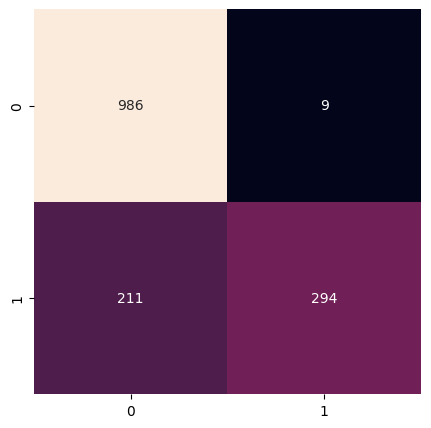

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y, y_pred), annot = True, cbar = False, fmt='.0f')
plt.show()

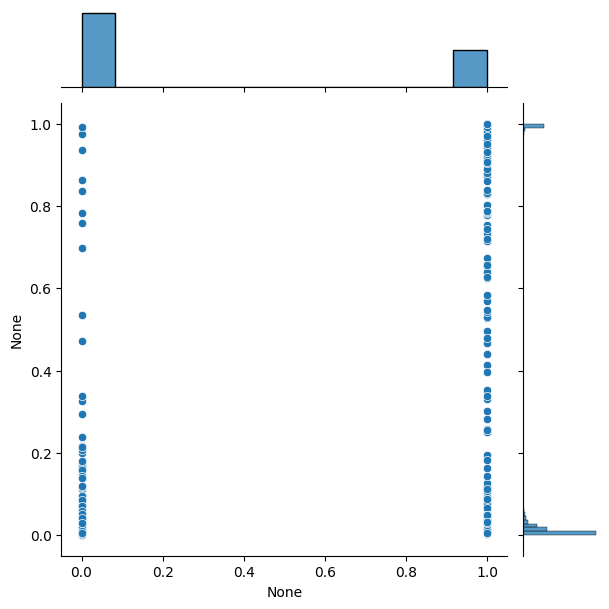

In [ ]:
sns.jointplot(x=y, y=cnn_y_hat_prob)
plt.show()

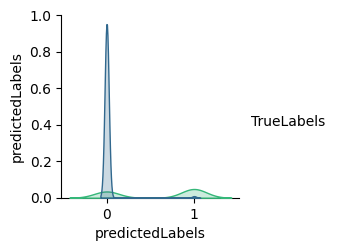

In [ ]:
df1=pd.DataFrame({'TrueLabels': df['label'], 'predictedLabels': df['predicted_class']})
sns.pairplot(df1, hue='TrueLabels', palette='viridis')
plt.show()